<pre><h1><center><bold style=" color:'red'">ImageMining:
Atelier N°é: CLASSIFICATION IMAGE </bold> 


Hicham Bayad  <br/>
S148011841  <br/>
 hicham98bayad@gamil.com</center></h1>





<h1> Import the necessary libraries.</h1>

</pre>

In [70]:
from os import listdir
import scipy.spatial.distance as dist
from matplotlib import image
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import atelierCBIR as base_index
import re
import csv

<h1>Prepare the data</h1>
<br><br><br>
    <h3>- À l'aide de l'atelier CBI, nous allons extraire les caractéristique de cet dataset</h3>
    <h3>- importer les fichiers csv qui contient les caractéristique de la data set (chaque image ayant 49 caractéristique ) </h3>

In [7]:
from os import listdir
from matplotlib import image

def loaded_imge(path):
    # load all images in a directory
    loaded_images_car = list()
    loaded_images_shipe = list()
    loaded_images_predict = list()
    # On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
    # Il faut charger Drive dans Colab

    #path='DataSet\obj_decoys'
    #path='DataToPredict'#'DB2C\\obj_car'
    nameImagesCar=[]
    nameImagesShipe=[]
    nameImagesPredict=[]
    for file in listdir(path) :
        if file != '.ipynb_checkpoints':
            
   
            #nameImages.append(path+'/' + filename)
           # print(path+'/' + filename)
            if( re.search('Predict',path+'/'+ file )):
                #nameImages.append(path+'/' + filename)
                for filename in listdir(path+'/'+ file) :
                    # load image
                    img_data = image.imread(path+'/'+ file+'/' + filename)
                    loaded_images_predict.append(img_data)
                    # store loaded image
                    nameImagesPredict.append(path+'/'+ file+'/' + filename)
               
            else :
                if(re.search( 'car' , path+'/' + file)):
                    for filename in listdir(path+'/'+ file) :
                        # load image
                        img_data = image.imread(path+'/'+ file+'/' + filename)
                        loaded_images_car.append(img_data)
                        # store loaded image
                        nameImagesCar.append(path+'/'+ file+'/' + filename)
                if(re.search('ship' ,path+'/' + file)):
                    for filename in listdir(path+'/'+ file) :
                        # load image
                        img_data = image.imread(path+'/'+ file+'/' + filename)
                        loaded_images_shipe.append(img_data)
                        # store loaded image
                        nameImagesShipe.append(path+'/'+ file+'/' + filename)
            # Activer l'instruction ci-dessus pour afficher les nom de images et les tailles
          #print(' %s %s ' % (filename, img_data.shape))
            #print(' %s %s ' % (filename, img_data.shape))
    return loaded_images_car , nameImagesCar,loaded_images_shipe,nameImagesShipe,loaded_images_predict,nameImagesPredict

In [8]:
#loaded_imge('DB2C')

In [9]:
def view_images(images ):
    # Afficher les 6 premières images
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(6, 6), dpi=200)
    import random
    id=random.sample(range(len(images)), 6)
    for i in range(6):
        ax1 = fig.add_subplot(3, 3, i+1)
        ax1.imshow(images[id[i]])
        ax1.set_title('image id: %s '% (id[i]))


====================================Car====================================


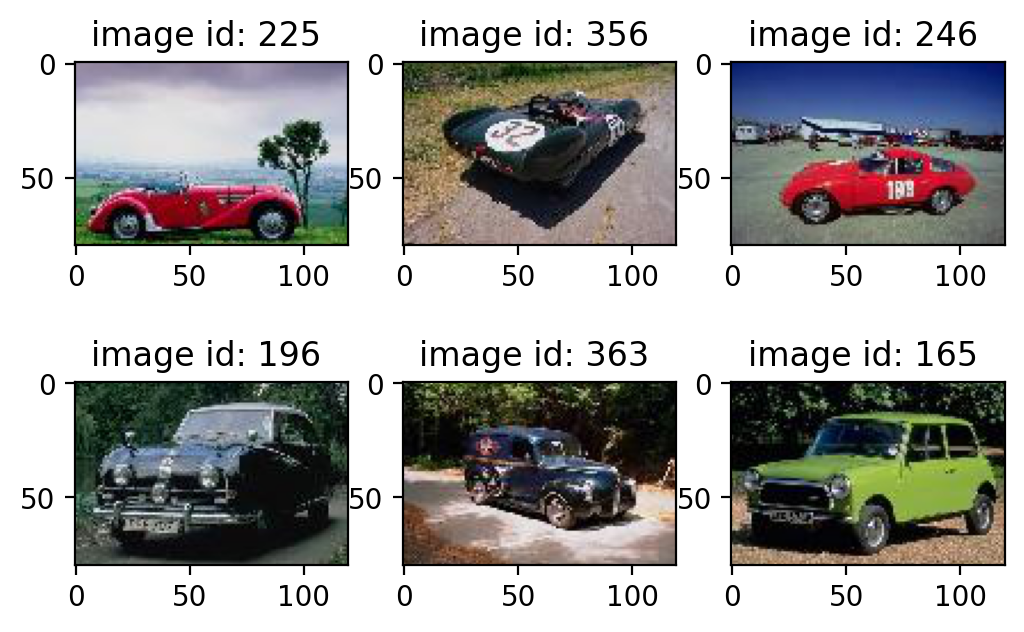

In [10]:
path='DB2C'
loaded_images_car , nameImagesCar,loaded_images_shipe,nameImagesShipe,loaded_images_predict,nameImagesPredict=loaded_imge(path)
print("====================================Car====================================")
view_images(loaded_images_car)


====================================Shipe====================================


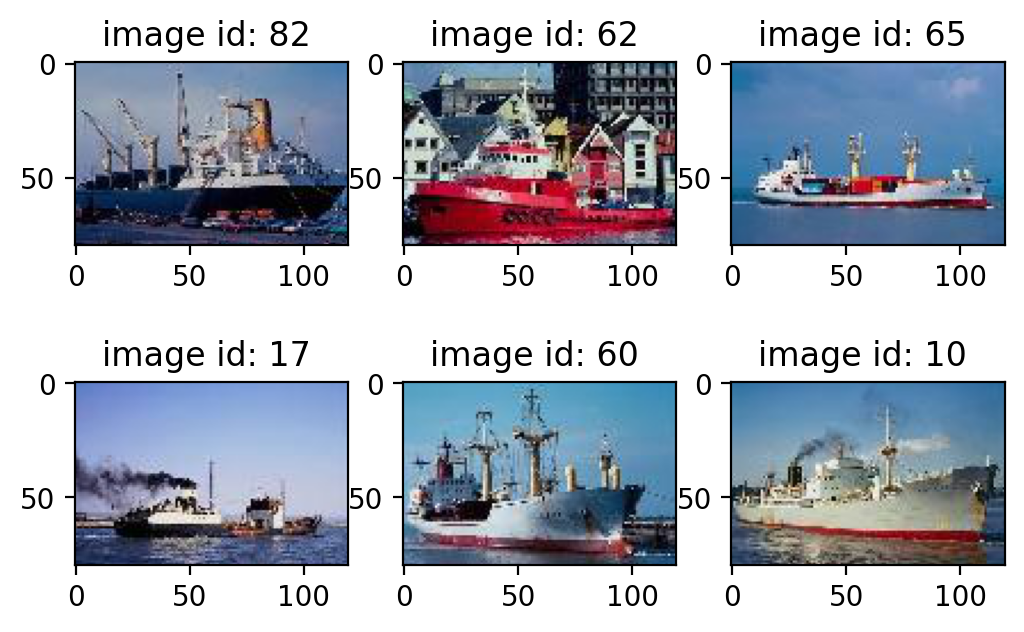

In [11]:

print("====================================Shipe====================================")
view_images(loaded_images_shipe)


====================================DataPredict====================================


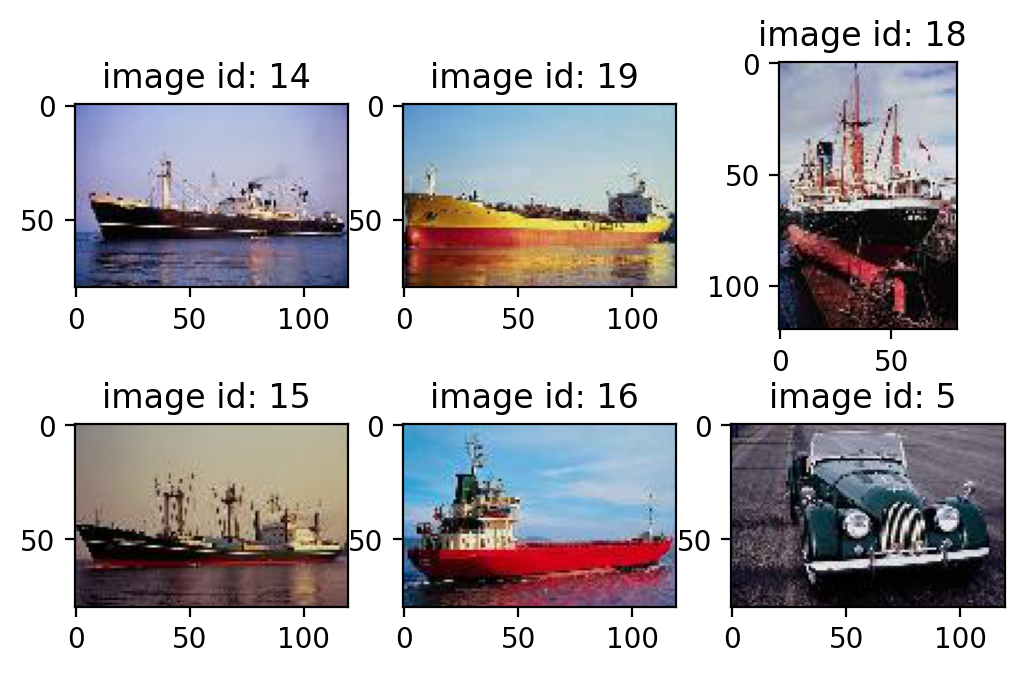

In [12]:

print("====================================DataPredict====================================")
view_images(loaded_images_predict)

In [15]:
indexation_baseFeatures_car = base_index.indexation_base(loaded_images_car)
indexation_baseFeatures_shipe = base_index.indexation_base(loaded_images_shipe)

#Concaténation la base d'indexation de car avec la base d'indexation shipe
indexation_baseFeatures=np.insert( indexation_baseFeatures_car , np.shape(indexation_baseFeatures_car)[1],indexation_baseFeatures_shipe , axis=0 )


indexation_baseFeatures_predict = base_index.indexation_base(loaded_images_predict)

In [19]:
print("La dim de la base d'indexation Car : " , np.shape(indexation_baseFeatures_car))
print("La dim de la base d'indexation Shipe : " , np.shape(indexation_baseFeatures_shipe))
print("La dim de la base d'indexation totale  : " , np.shape(indexation_baseFeatures))
np.shape(indexation_baseFeatures)

La dim de la base d'indexation Car :  (400, 49)
La dim de la base d'indexation Shipe :  (90, 49)
La dim de la base d'indexation totale  :  (490, 49)


(490, 49)

<h3>On va labellisé les images </h3>
<h3>Car -->  Par 1 , initialiser un tableau par des 1 </h3>
<h3>Ship --> Par 0 ,  initialiser un tableau par des 0 </h3>
<h3>Et Concaténer les features de voiture avec les features de bateaux dans un seul tableaux (dim : 490 images et 49:features +1 : label) </h3>

In [149]:
def labeled_images(path ):
    loaded_images_car , nameImagesCar,loaded_images_shipe,nameImagesShipe,loaded_images_predict,nameImagesPredict = loaded_imge(path)
    
    indexation_baseFeatures_car = base_index.indexation_base(loaded_images_car)
    indexation_baseFeatures_shipe = base_index.indexation_base(loaded_images_shipe)

    indexation_baseFeatures_predict = base_index.indexation_base(loaded_images_predict)
    
    #cette base c'est la base des caractéristique de nouveaux données on va predidire apres ,fusionner les noms des images avesc les caractéristique 
    #indexation_baseFeatures=np.insert( indexation_baseFeatures , 0 , nameImages , axis=1)
    indexation_baseFeatures_predict=np.c_[ indexation_baseFeatures_predict , nameImagesPredict  ]
    # Étiquetage
    labels_car=np.zeros(np.shape(indexation_baseFeatures_car)[0])
    labels_shipe=np.ones(np.shape(indexation_baseFeatures_shipe)[0])

    # On a ajouter les labels dans un bas d'indexation
    indexation_baseFeatures_car=np.insert( indexation_baseFeatures_car , np.shape(indexation_baseFeatures_car)[1] , labels_car , axis=1)
    indexation_baseFeatures_shipe=np.insert( indexation_baseFeatures_shipe , np.shape(indexation_baseFeatures_shipe)[1] , labels_shipe , axis=1)
    
    
    #Concaténation la base d'indexation de car avec la base d'indexation shipe
    indexation_baseFeatures_labels=np.insert( indexation_baseFeatures_car , np.shape(indexation_baseFeatures_car)[1],indexation_baseFeatures_shipe , axis=0 )

    return indexation_baseFeatures_labels , indexation_baseFeatures_predict

In [35]:
def indexe_base(path):
    
    return labeled_images(path )

In [36]:
path='DB2C'
indexation_baseFeatures_labels , indexation_baseFeatures_predict = indexe_base(path)

In [74]:
print('La dim de Base : ', np.shape(indexation_baseFeatures_labels))
print('La dim de base de prediction  : ', np.shape(indexation_baseFeatures_predict))

La dim de Base :  (490, 50)
La dim de base de prediction  :  (20, 50)


<h3>Ona creé une fonction pour sauvegarder les résultat dans un fichier csv</h3>

In [85]:
def create_file_csv(indexation_baseFeatures , path ,predict=False):
    tab=[]
    s=""
    for i in range(50):
        #print(i)
        if(i==49 ):
            if(predict ):
                tab.append("labels")
            else :
                tab.append("PathImages")
                s="_predict"
        else:
            tab.append('f'+str(i))

    i=0
    with open( "indexing_basis"+s+".csv" ,'w' ,newline='' )as file:
        if(i==0 ):
            mywriter=csv.writer(file)
            mywriter.writerows([tab])
            i+=1

        mywriter=csv.writer(file,delimiter=',')
        mywriter.writerows(indexation_baseFeatures)

In [96]:
#Creé un fichier CSV et sauvegarder les caractérstiques des images de base 
create_file_csv(indexation_baseFeatures_labels , path ,True)

import pandas as pd
features=pd.read_csv(r'indexing_basis.csv')
features.head(51)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f40,f41,f42,f43,f44,f45,f46,f47,f48,labels
0,49.851979,60.420665,48.162708,59.648662,47.352292,58.871697,278.0,1.0,0.0,2.0,...,10.358934,9.714369,20.400486,12.621349,-19.762214,489.528046,0.331674,0.078816,0.931064,0.0
1,65.945521,70.336942,56.424062,47.035273,64.385104,49.545235,106.0,0.0,0.0,0.0,...,8.387171,8.122437,-16.420330,-11.605126,16.749620,391.996113,0.248290,0.027492,0.916549,0.0
2,111.290312,58.906375,84.765833,55.114600,69.018438,53.422373,127.0,0.0,0.0,0.0,...,8.498350,9.572768,-18.614345,12.466073,-19.389985,687.140021,0.195436,0.024782,0.882437,0.0
3,112.683229,54.710720,78.975000,54.802545,61.974688,52.414711,120.0,0.0,0.0,0.0,...,8.371585,9.713955,19.737769,-13.404577,-18.759108,407.778151,0.305415,0.036665,0.928948,0.0
4,120.945208,47.836738,101.041146,47.411381,77.720208,47.466326,209.0,0.0,0.0,0.0,...,8.523219,10.211819,19.761423,13.621786,19.702296,396.666282,0.259601,0.030845,0.909886,0.0
5,103.129271,54.748041,110.301042,60.287328,109.064479,60.831039,100.0,0.0,2.0,0.0,...,10.266076,10.519338,21.029920,13.626664,-21.100989,707.583613,0.228861,0.021862,0.900225,0.0
6,120.399167,57.698332,116.780417,57.594338,107.941667,58.173925,163.0,3.0,1.0,1.0,...,9.808422,11.727407,22.496132,15.050899,23.709839,651.069118,0.205372,0.022349,0.901376,0.0
7,73.627917,56.752536,61.297917,43.230137,61.812188,46.295309,123.0,1.0,0.0,0.0,...,9.097866,8.462215,-17.780169,11.503411,17.261303,679.453361,0.186914,0.023045,0.825865,0.0
8,68.538646,57.747431,65.742604,54.451478,57.312604,44.752182,85.0,0.0,0.0,0.0,...,9.310151,9.545331,-19.644206,12.700046,18.983177,582.994538,0.190950,0.022923,0.884898,0.0
9,87.633542,60.254762,83.029896,56.666016,84.112813,56.341746,139.0,2.0,0.0,0.0,...,8.321661,9.550740,18.757156,13.010515,-18.560736,904.301261,0.261043,0.032050,0.859465,0.0


# -----------------------------------------------------------------------------------------------------

In [98]:
indexation_baseFeatures_labels[40]

array([7.60495833e+01, 5.52139535e+01, 4.23751042e+01, 3.65562584e+01,
       4.25010417e+01, 3.48474921e+01, 1.70000000e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.70000000e+01, 2.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 6.20000000e+01, 7.00000000e+00,
       1.00000000e+00, 4.00000000e+00, 4.00000000e+00, 2.00000000e+00,
       1.00000000e+00, 1.00000000e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       2.00000000e+00, 4.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.97809113e+00, 4.65660232e+00,
       5.62667857e+00, 5.88894328e+00, 1.16467943e+01, 8.24113592e+00,
       1.35138461e+01, 6.46236975e+02, 3.82486822e-01, 6.50365338e-02,
       7.42063247e-01, 0.00000000e+00])

In [99]:
type(features)

pandas.core.frame.DataFrame

In [100]:
np.shape(features)

(490, 50)

<h3>Extraire la partie étiquettes et la partie des caractéristiques</h3>

In [101]:
X=features.drop('labels',axis=1)
#(['labels'] , axis=1)
#Y=features['labels']
X

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48
0,49.851979,60.420665,48.162708,59.648662,47.352292,58.871697,278.0,1.0,0.0,2.0,...,5.810982,10.358934,9.714369,20.400486,12.621349,-19.762214,489.528046,0.331674,0.078816,0.931064
1,65.945521,70.336942,56.424062,47.035273,64.385104,49.545235,106.0,0.0,0.0,0.0,...,6.740938,8.387171,8.122437,-16.420330,-11.605126,16.749620,391.996113,0.248290,0.027492,0.916549
2,111.290312,58.906375,84.765833,55.114600,69.018438,53.422373,127.0,0.0,0.0,0.0,...,5.323313,8.498350,9.572768,-18.614345,12.466073,-19.389985,687.140021,0.195436,0.024782,0.882437
3,112.683229,54.710720,78.975000,54.802545,61.974688,52.414711,120.0,0.0,0.0,0.0,...,6.187174,8.371585,9.713955,19.737769,-13.404577,-18.759108,407.778151,0.305415,0.036665,0.928948
4,120.945208,47.836738,101.041146,47.411381,77.720208,47.466326,209.0,0.0,0.0,0.0,...,6.674279,8.523219,10.211819,19.761423,13.621786,19.702296,396.666282,0.259601,0.030845,0.909886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,132.943125,54.075315,128.406563,42.706923,98.825104,47.749148,75.0,0.0,0.0,0.0,...,6.495526,9.491492,10.122484,-20.164225,13.717416,20.019448,713.639076,0.081862,0.015655,0.789257
486,101.416771,45.132533,99.319167,45.499895,87.894688,62.832630,7.0,0.0,0.0,0.0,...,5.937907,9.778534,9.318049,-19.327338,12.355801,-18.894019,638.489076,0.183502,0.024407,0.857614
487,99.102187,40.563727,99.232396,38.995337,98.131146,62.727292,0.0,0.0,0.0,0.0,...,5.984441,9.622560,10.231569,-20.326912,-13.381965,20.292729,629.392542,0.256678,0.038484,0.825635
488,77.833958,52.716705,79.530104,49.095775,55.428125,56.348152,125.0,0.0,0.0,0.0,...,5.592746,8.769983,8.925424,17.773201,11.726610,19.509013,679.322164,0.081289,0.017152,0.871881


In [102]:
Y=features['labels']

In [103]:
Y.shape

(490,)

<h3>nous allons répartir la base
d’indexes en deux parties ; base d’apprentissage (80%) et base de test (20%)</h3>

In [104]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X ,Y ,test_size=0.2 ,random_state=0 )

In [105]:
print("la dim de X_train ",np.shape(X_train))
print("la dim X_test ",np.shape(X_test))

la dim de X_train  (392, 49)
la dim X_test  (98, 49)


In [106]:
print("la dim de y_train ",np.shape(y_train))
print("la dim y_test ",np.shape(y_test))

la dim de y_train  (392,)
la dim y_test  (98,)


<h1>SVM</h1>
<h3>. importer SVC de classification </h3>
<h3>. importer la matrices de confusion (accuracy)  </h3>

In [153]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

<h3>Instancer le classifieur avec des parametre par defaut </h3>

In [154]:
svc=SVC()

<h3>Entrainer  le Modéle</h3>

In [155]:
svc.fit(X_train,y_train)

SVC()

<h3>La prédiction sera avec la base
de test</h3>

In [156]:
y_pred_svm=svc.predict(X_test)

<h3>Afficher la matrices de confusion et calculer accuracy</h3>

L'accuracy de la modéle avec hyperparameters par defaut 0.9286


<AxesSubplot:>

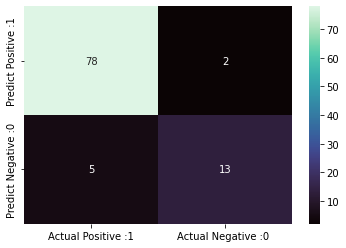

In [157]:
print("L'accuracy de la modéle avec hyperparameters par defaut {0:0.4f}".format(accuracy_score(y_test,y_pred_svm)))



from sklearn.metrics import confusion_matrix
cm=confusion_matrix( y_test , y_pred_svm )
cm_matrix=pd.DataFrame(data=cm , columns=['Actual Positive :1' ,'Actual Negative :0 '] ,
                       index=['Predict Positive :1' ,'Predict Negative :0'])

import seaborn as sns # Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical ...
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [158]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96        80
         1.0       0.87      0.72      0.79        18

    accuracy                           0.93        98
   macro avg       0.90      0.85      0.87        98
weighted avg       0.93      0.93      0.93        98



<h1> KNN: </h1>

In [159]:
from sklearn.neighbors import KNeighborsClassifier

In [160]:
knn=KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train ,y_train)

KNeighborsClassifier(n_neighbors=2)

In [161]:
y_predict_knn=knn.predict(X_test)

L'accuracy de la modéle avec hyperparameters par defaut 0.8878


<AxesSubplot:>

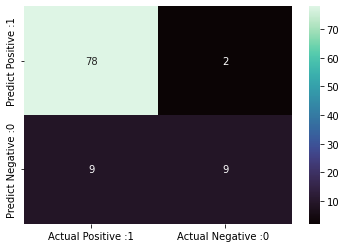

In [162]:
print("L'accuracy de la modéle avec hyperparameters par defaut {0:0.4f}".format(accuracy_score(y_test,y_predict_knn)))



from sklearn.metrics import confusion_matrix
cm1=confusion_matrix( y_test , y_predict_knn )
cm1_matrix=pd.DataFrame(data=cm1 , columns=['Actual Positive :1' ,'Actual Negative :0 '] ,
                       index=['Predict Positive :1' ,'Predict Negative :0'])

import seaborn as sns # Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical ...
sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='mako')

In [163]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_predict_knn))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93        80
         1.0       0.82      0.50      0.62        18

    accuracy                           0.89        98
   macro avg       0.86      0.74      0.78        98
weighted avg       0.88      0.89      0.88        98



<h1>A l'aide d'Arbre de decision  </h1>

In [164]:
from sklearn import tree

dt=tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_predict_dt=dt.predict(X_test)

L'accuracy de la modéle avec hyperparameters par defaut 0.9388


<AxesSubplot:>

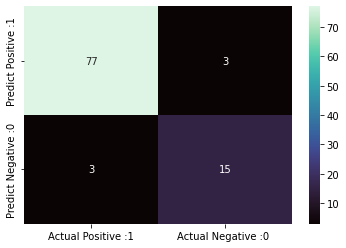

In [165]:
print("L'accuracy de la modéle avec hyperparameters par defaut {0:0.4f}".format(accuracy_score(y_test,y_predict_dt)))



from sklearn.metrics import confusion_matrix
cm2=confusion_matrix( y_test , y_predict_dt )
cm2_matrix=pd.DataFrame(data=cm2 , columns=['Actual Positive :1' ,'Actual Negative :0 '] ,
                       index=['Predict Positive :1' ,'Predict Negative :0'])

import seaborn as sns # Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical ...
sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='mako')

<h3>Comparer les score de chaque modéle</h3>

In [166]:
data =[[accuracy_score(y_test,y_pred_svm)],[accuracy_score(y_test ,y_predict_knn)],[accuracy_score(y_test,y_predict_dt)]]
header=["SVM","KNN","Decision Trees"]
print(pd.DataFrame(data,header,["Accuracy"]))

                Accuracy
SVM             0.928571
KNN             0.887755
Decision Trees  0.938776


<h3>. Prédire les étiquettes des images dans le dossier « DataToPredict » </h3>
<h3>. Les étiquettes prédites ainsi queles noms des images doivent être enregistrés dans un fichier
« Prediction_corelDB_VotreNom_Master.csv » </h3>

In [167]:
#Creé un fichier CSV et sauvegarder les caractérstiques des images de base de prediction
create_file_csv(indexation_baseFeatures_predict , path )

import pandas as pd
featuresToPredict=pd.read_csv(r'indexing_basis_predict.csv')
featuresToPredict.head(20)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f40,f41,f42,f43,f44,f45,f46,f47,f48,PathImages
0,57.545938,57.050763,54.052813,50.678879,39.686875,33.144989,120.0,0.0,0.0,0.0,...,7.500419,8.206067,16.730119,11.440094,16.069431,506.365336,0.228422,0.047215,0.875602,DB2C/DataToPredict/29011.jpg
1,115.085208,50.839630,103.744375,49.106299,90.213854,52.977981,120.0,0.0,0.0,0.0,...,9.097903,9.282550,18.862831,12.065091,-18.512172,627.659979,0.220802,0.032625,0.873645,DB2C/DataToPredict/29013.jpg
2,117.730521,74.248764,87.898854,61.707106,57.111250,43.711687,80.0,0.0,0.0,0.0,...,8.785651,8.943904,17.809110,13.006552,19.161769,764.181329,0.287146,0.036865,0.882817,DB2C/DataToPredict/29055.jpg
3,90.904792,63.674085,109.371562,64.807837,87.105000,62.455923,107.0,3.0,1.0,1.0,...,9.484827,9.602069,19.275117,12.637928,19.319177,1081.436660,0.129300,0.018789,0.859493,DB2C/DataToPredict/354001.jpg
4,67.923229,51.010265,77.345625,51.668076,64.602604,47.446699,164.0,3.0,0.0,0.0,...,7.658690,7.689115,15.363552,10.318039,16.667611,720.168172,0.105495,0.017256,0.857215,DB2C/DataToPredict/354053.jpg
5,77.093125,60.903406,77.302396,59.894838,87.882812,61.567300,108.0,0.0,0.0,0.0,...,9.722579,9.695444,-19.490890,13.189451,-19.646276,1562.717122,0.132299,0.021730,0.786343,DB2C/DataToPredict/447012.jpg
6,114.170000,69.514852,95.365625,63.337994,66.962604,52.787632,165.0,3.0,3.0,0.0,...,9.690413,9.652451,-19.390780,12.762087,-19.612152,1423.271639,0.070770,0.013501,0.798181,DB2C/DataToPredict/447063.jpg
7,143.220625,55.777767,140.145938,52.841284,101.241771,61.143186,150.0,0.0,0.0,1.0,...,10.282346,11.211769,22.101210,-14.395336,22.117791,852.152626,0.129758,0.025918,0.849920,DB2C/DataToPredict/521022.jpg
8,99.742396,56.951085,98.045833,52.692919,74.616667,53.270729,125.0,2.0,1.0,0.0,...,8.340158,8.357107,17.024358,11.041469,-16.762648,1113.812605,0.107206,0.015569,0.787418,DB2C/DataToPredict/521079.jpg
9,119.179479,61.293129,111.448021,55.405682,100.965729,57.535717,161.0,0.0,0.0,0.0,...,9.125565,9.417180,18.812360,12.564902,18.869526,1410.938761,0.239592,0.031184,0.773577,DB2C/DataToPredict/521090.jpg


<h3>En utilisant les algorithme précédemment pour prédire les nouveaux data </h3>

In [168]:
# Suprimer la coloonne 'PathImages' pour passe les neveaux data a les modéle precedamment 
new_data=featuresToPredict.drop(['PathImages'],axis=1)

y_newData_svc=svc.predict(new_data)
y_newData_knn=knn.predict(new_data)
y_newData_dt=dt.predict(new_data)

In [169]:
y_newData_dt

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1.])

In [170]:
headers=[ "imagesNane", "SVM Prediction","KNN Prediction" ,"TD Prediction" ]

y_newData_svc=['Obj_car' if x==0 else 'Obj_ship' for x in y_newData_svc ]
y_newData_knn=['Obj_car' if x==0 else 'Obj_ship' for x in y_newData_knn ]
y_newData_dt= ['Obj_car' if x==0 else 'Obj_ship' for x in y_newData_dt  ]


In [171]:
y_newData_dt

['Obj_car',
 'Obj_car',
 'Obj_car',
 'Obj_car',
 'Obj_car',
 'Obj_car',
 'Obj_car',
 'Obj_ship',
 'Obj_car',
 'Obj_car',
 'Obj_ship',
 'Obj_ship',
 'Obj_ship',
 'Obj_ship',
 'Obj_ship',
 'Obj_car',
 'Obj_ship',
 'Obj_ship',
 'Obj_car',
 'Obj_ship']

In [172]:
np.shape(y_newData_dt)

(20,)

In [173]:
#redimensinner l

path=np.array(featuresToPredict['PathImages']).reshape((featuresToPredict['PathImages'].shape[0],1))
svm=np.array(y_newData_svc).reshape((featuresToPredict['PathImages'].shape[0],1))
knn=np.array(y_newData_knn).reshape((featuresToPredict['PathImages'].shape[0],1))
td =np.array(y_newData_dt).reshape((featuresToPredict['PathImages'].shape[0],1))

In [174]:
np.shape(path)

(20, 1)

<h3>on va fusionner tous les résultat dans matrices et apres sauvgader dans fichier CSV </h3>

In [175]:
resultat_prediction=np.concatenate((path,svm,knn,td),axis=1)
resultat_prediction

array([['DB2C/DataToPredict/29011.jpg', 'Obj_car', 'Obj_car', 'Obj_car'],
       ['DB2C/DataToPredict/29013.jpg', 'Obj_car', 'Obj_car', 'Obj_car'],
       ['DB2C/DataToPredict/29055.jpg', 'Obj_car', 'Obj_car', 'Obj_car'],
       ['DB2C/DataToPredict/354001.jpg', 'Obj_car', 'Obj_car', 'Obj_car'],
       ['DB2C/DataToPredict/354053.jpg', 'Obj_car', 'Obj_car', 'Obj_car'],
       ['DB2C/DataToPredict/447012.jpg', 'Obj_car', 'Obj_car', 'Obj_car'],
       ['DB2C/DataToPredict/447063.jpg', 'Obj_car', 'Obj_car', 'Obj_car'],
       ['DB2C/DataToPredict/521022.jpg', 'Obj_car', 'Obj_car',
        'Obj_ship'],
       ['DB2C/DataToPredict/521079.jpg', 'Obj_car', 'Obj_car', 'Obj_car'],
       ['DB2C/DataToPredict/521090.jpg', 'Obj_car', 'Obj_car', 'Obj_car'],
       ['DB2C/DataToPredict/535000.jpg', 'Obj_car', 'Obj_car',
        'Obj_ship'],
       ['DB2C/DataToPredict/535010.jpg', 'Obj_ship', 'Obj_car',
        'Obj_ship'],
       ['DB2C/DataToPredict/535015.jpg', 'Obj_car', 'Obj_car',
        'Obj

In [176]:
df=pd.DataFrame(resultat_prediction ,columns= headers)

df.to_csv('resultat_prediction.csv')

In [177]:
afficher_resulte=pd.read_csv('resultat_prediction.csv')
afficher_resulte.head(20)

,Unnamed: 0,imagesNane,SVM Prediction,KNN Prediction,TD Prediction
0,0,DB2C/DataToPredict/29011.jpg,Obj_car,Obj_car,Obj_car
1,1,DB2C/DataToPredict/29013.jpg,Obj_car,Obj_car,Obj_car
2,2,DB2C/DataToPredict/29055.jpg,Obj_car,Obj_car,Obj_car
3,3,DB2C/DataToPredict/354001.jpg,Obj_car,Obj_car,Obj_car
4,4,DB2C/DataToPredict/354053.jpg,Obj_car,Obj_car,Obj_car
5,5,DB2C/DataToPredict/447012.jpg,Obj_car,Obj_car,Obj_car
6,6,DB2C/DataToPredict/447063.jpg,Obj_car,Obj_car,Obj_car
7,7,DB2C/DataToPredict/521022.jpg,Obj_car,Obj_car,Obj_ship
8,8,DB2C/DataToPredict/521079.jpg,Obj_car,Obj_car,Obj_car
9,9,DB2C/DataToPredict/521090.jpg,Obj_car,Obj_car,Obj_car


<h3>maintenant ,on va créer deux repértoire , le premier dossier sauvegarde les resultat de prediction des voiture  et deuxime pour  les resultat de prediction des bateaux , cette opération faire a chaque modéle  </h3>

In [178]:
import os
import shutil


#Crée un dossier contient les resultat s'appel 'Resultat'
k=1
folder_path = "Resultat"

if os.path.exists(folder_path):
    print("Folder exists!")
else:
    print("Folder does not exist.")
    os.mkdir('Resultat')
    
    os.mkdir('Resultat/SVM')
    os.mkdir('Resultat/KNN')
    os.mkdir('Resultat/TD')
    
    os.mkdir('Resultat/SVM/obj_car')
    os.mkdir('Resultat/SVM/obj_ship')
    
    os.mkdir('Resultat/KNN/obj_car')
    os.mkdir('Resultat/KNN/obj_ship')
    
    os.mkdir('Resultat/TD/obj_car')
    os.mkdir('Resultat/TD/obj_ship')    

    
    
for j in range(2,len(afficher_resulte.columns)):
    
    if(afficher_resulte.columns[j] == 'SVM Prediction'):
        for i in range(np.shape(afficher_resulte)[0]):
            if( afficher_resulte[afficher_resulte.columns[j]][i] == 'Obj_car'):
                shutil.copy(  afficher_resulte['imagesNane'][i] , 'Resultat/SVM/obj_car')
            else:
                shutil.copy(afficher_resulte['imagesNane'][i], 'Resultat/SVM/obj_ship' )
                
    elif(afficher_resulte.columns[j] == 'KNN Prediction'):
        for i in range(np.shape(afficher_resulte)[0]):
            if( afficher_resulte[afficher_resulte.columns[j]][i] == 'Obj_car'):
                shutil.copy(  afficher_resulte['imagesNane'][i] , 'Resultat/KNN/obj_car')
            else:
                shutil.copy(afficher_resulte['imagesNane'][i], 'Resultat/KNN/obj_ship' )
    
    else :
        for i in range(np.shape(afficher_resulte)[0]):
            #if(afficher_resulte.columns[j] == 'TD Prediction'):
            if(afficher_resulte[afficher_resulte.columns[j]][i] == 'Obj_car'):
                shutil.copy(  afficher_resulte['imagesNane'][i] , 'Resultat/TD/obj_car')
            else:
                shutil.copy(afficher_resulte['imagesNane'][i], 'Resultat/TD/obj_ship' )

Folder does not exist.


In [150]:
#afficher_resulte['imagesNane'][6]

'DataToPredict/447063.jpg'

In [141]:
#afficher_resulte.columns[2]

'SVM Prediction'

In [140]:
for j in range(2,5) :
    print(j)

2
3
4


In [149]:
#afficher_resulte[afficher_resulte.columns[2]][0]

'Obj_car'

In [153]:
#shutil.copy(afficher_resulte['imagesNane'][6], 'Resultat/SVM/obj_ship' )

'Resultat/SVM/obj_ship\\447063.jpg'